In [86]:
import pandas as pd
from bs4 import BeautifulSoup

In [87]:
with open("data/raw.html") as fp:
    soup = BeautifulSoup(fp)

In [95]:
reg_partier = {'Centrum-Demokraterne',
 'Danmarks Retsforbund',
 'Det Konservative Folkeparti',
 'Det Radikale Venstre',
 'Kristeligt Folkeparti',
 'Liberal Alliance',
 'Radikale Venstre',
 'Socialdemokratiet',
 'Socialistisk Folkeparti',
 'Venstre'}

In [148]:
data = []

for reg in soup.body.children:
    if len(str(reg))>10:
        rid = reg.attrs["data-accordion-id"]
        rnavn = reg.span.contents[0]
        
        b = reg.find_all("div", class_="panel-body")[0]
        reg_data = [x.strip() for x in b.get_text().split("\n") if x.strip()]
        # 0 = partier
        pnavne = [x.strip() for x in reg_data[0].replace("og", ",").split(",")]
        pnavne_dict = {pnavn: True if pnavn in pnavne else False for pnavn in reg_partier}
        # 1 = datoer
        datoer = reg_data[1]
        # nogen gange extra info
        ekstra = ""
        mstart = 2
        m_start_not_found = True
        while m_start_not_found:
            if ":" in reg_data[mstart]:
                m_start_not_found = False
            else:
                ekstra += reg_data[mstart]
                mstart += 1
        
        # resten er ministerie: navn
        # med et par undtagelser...
        mns = {}
        for mn in reg_data[mstart+1:]:
            if mn.count(":") == 1:
                mini, navn = mn.split(":")
                mns[mini.strip()] = navn.strip()
            else:
                print(f"uventet linje: {rnavn}, {mn}")
        
        data.append({'rid': rid, 'rnavn': rnavn, 'periode': datoer, 'ekstra': ekstra, **pnavne_dict, **mns})
df = pd.DataFrame(data)
df.head()

uventet linje: Regeringen H.C. Hansen II, død 19. februar 1960
uventet linje: Regeringen Viggo Kampmann I, derefter Lars P. Jensen (S)
uventet linje: Regeringen Viggo Kampmann II, 1961, derefter Hilmar Baunsgaard (RV)
uventet linje: Regeringen Jens Otto Krag I, Hansen (Kalundborg) (S)
uventet linje: Regeringen Jens Otto Krag II , Ivar Nørgaard, fra 1. oktober 1967 tillige minister for europæiske markedsanliggender
uventet linje: Regeringen Jens Otto Krag II , for nordiske anliggender samt europæiske markedsanliggender). Fra 1. oktober 1967 Ove Hansen
uventet linje: Regeringen Jens Otto Krag II , (handelsminister og minister for nordiske anliggender)
uventet linje: Regeringen Jens Otto Krag II , Minister uden portefølje (med henblik på udenrigspolitiske spørgsmål, navnlig forholdet til De Forenede
uventet linje: Regeringen Jens Otto Krag II , 1967
uventet linje: Regeringen Hilmar Baunsgaard, Minister for kulturelle anliggender og minister for teknisk samarbejde med udviklingslandene sam

,rid,rnavn,periode,ekstra,Det Radikale Venstre,Radikale Venstre,Socialistisk Folkeparti,Kristeligt Folkeparti,Centrum-Demokraterne,Det Konservative Folkeparti,...,Minister for ligestilling og minister for nordisk samarbejde,Minister for offentlig innovation,Børne- og socialminister,"Transport-, bygnings- og boligminister",Ældreminister,"Klima-, energi- og forsyningsminister","Minister for fødevarer, fiskeri og ligestilling og minister for nordisk samarbejde","til 19. november 2020, derefter minister for fødevarer, landbrug og fiskeri",ligestilling,udviklingssamarbejde og minister for nordisk samarbejde
0,4573FD18541E4D8DBD0F1A02EE8B8A8B,Regeringen Hans Hedtoft III,Fra 30. september 1953 til 1. februar 1955.,Ændringer 1. november 1953 og 29. januar 1955.,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02E181CBEB3641129134719EEABB1873,Regeringen H.C. Hansen I,Fra 1. februar 1955 til 28. maj 1957.,Ændringer 30. august 1955 og 25. maj 1956.,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9B7D81870FED4413AC5ECEC17057EF71,Regeringen H.C. Hansen II,Fra 28. maj 1957 til 21. februar 1960.,Ændringer 8. oktober 1958 og 19. februar 1960.,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8A787B018D814B0481D63165D87A3059,Regeringen Viggo Kampmann I,Fra 21. februar til 18. november 1960.,Ændring 31. marts 1960.,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87DB4786044541D493C0BF96ACEEB08F,Regeringen Viggo Kampmann II,Fra 18. november 1960 til 3. september 1962.,Ændring 7. september 1961.,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
df[df.columns[df.columns.isin(partier)]].sum()

Det Radikale Venstre           10
Radikale Venstre                2
Socialistisk Folkeparti         1
Kristeligt Folkeparti           3
Centrum-Demokraterne            4
Det Konservative Folkeparti    10
Socialdemokratiet              20
Liberal Alliance                1
Danmarks Retsforbund            2
Venstre                        13
dtype: int64

<AxesSubplot: >

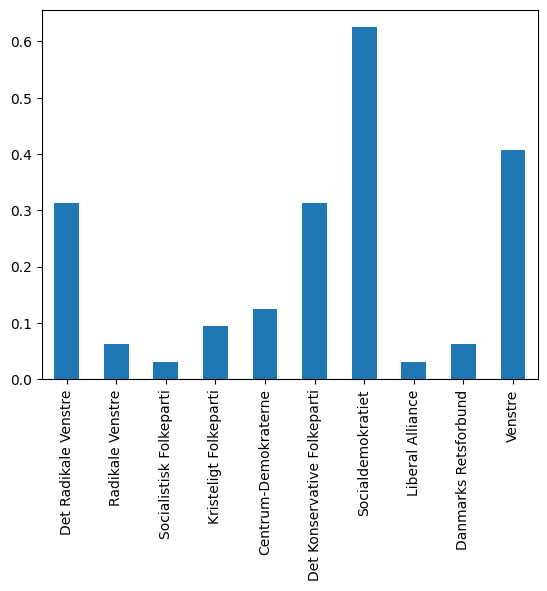

In [161]:
(df[df.columns[df.columns.isin(partier)]].sum()/len(df)).plot(kind='bar')

<AxesSubplot: >

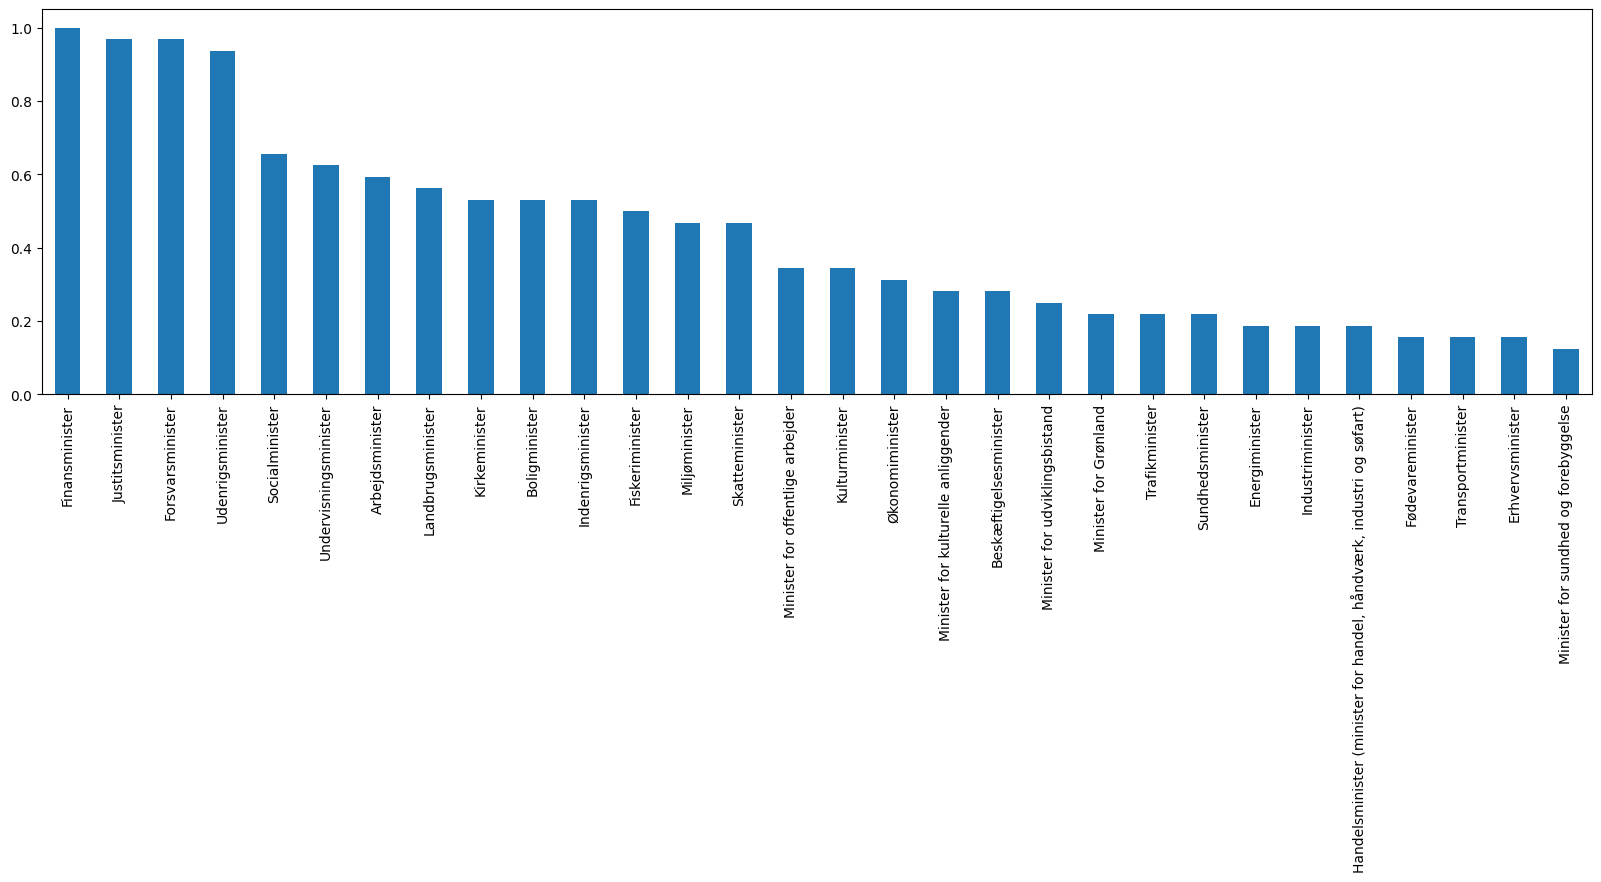

In [180]:
(df[df.columns[~df.columns.isin(partier) & ~df.columns.isin(['rid', 'navn', 'rnavn', 'periode', 'ekstra'])]].count().sort_values(ascending=False).head(30)/len(df)).plot(kind='bar', figsize=(20,5))

<AxesSubplot: >

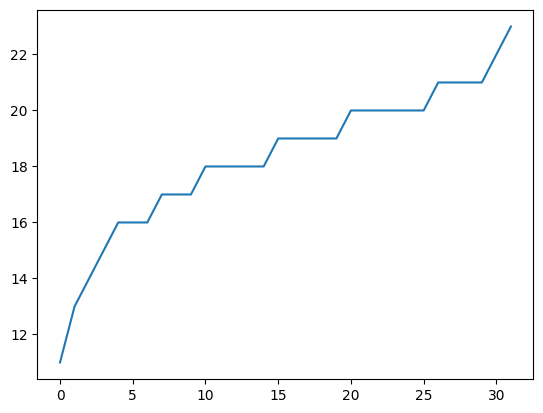

In [187]:
df[df.columns[~df.columns.isin(partier) & ~df.columns.isin(['rid', 'navn', 'rnavn', 'periode', 'ekstra'])]].T.count().sort_values().reset_index(drop=True).plot()

<AxesSubplot: ylabel='Frequency'>

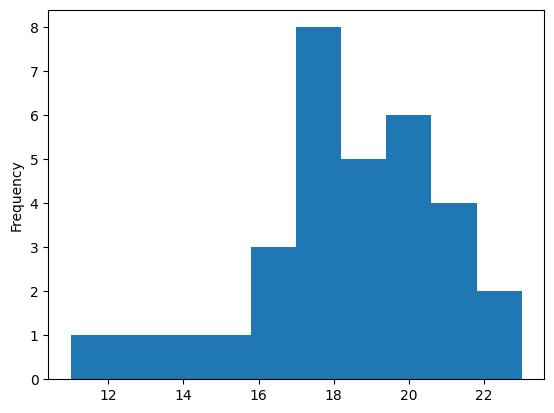

In [192]:
df[df.columns[~df.columns.isin(partier) & ~df.columns.isin(['rid', 'navn', 'rnavn', 'periode', 'ekstra'])]].T.count().plot(kind='hist')

In [194]:
df[df.columns[~df.columns.isin(partier) & ~df.columns.isin(['rid', 'navn', 'rnavn', 'periode', 'ekstra'])]].T.count().value_counts().sort_index()

11    1
13    1
14    1
15    1
16    3
17    3
18    5
19    5
20    6
21    4
22    1
23    1
dtype: int64